#                                                                                            Banking Project

## Importing, Understanding, and Inspecting Data

In [264]:
import pandas as pd
import seaborn as sns
import numpy as np

from datetime import datetime
from IPython.display import display

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

from IPython.core.display import display, HTML


C:\Users\Amir\AppData\Local\Temp\ipykernel_16496\757995657.py:11: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython.display
  from IPython.core.display import display, HTML


In [265]:
df = pd.read_csv(r"C:\Users\Amir\Dropbox\ibm simpli learn\Data Analyst Capstone\Banking\Project2_Dataset\Dataset\data.csv")
df

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01/01/1984,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,417566,53278,61360,89.63,67,22807,45,1497,24/08/1985,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
2,539055,52378,60300,88.39,67,22807,45,1495,09/12/1977,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1
3,529269,46349,61500,76.42,67,22807,45,1502,01/06/1988,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
4,563215,43594,78256,57.50,67,22744,86,1499,14/07/1994,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,561031,57759,76350,77.28,5,22289,51,3326,10/11/1981,Self employed,...,0,0,0,0,0,0,2yrs 4mon,2yrs 4mon,0,0
233150,649600,55009,71200,78.72,138,17408,51,3385,15/10/1992,Self employed,...,0,0,15209,0,0,0,1yrs 5mon,1yrs 5mon,1,0
233151,603445,58513,68000,88.24,135,23313,45,1797,19/12/1981,Self employed,...,0,0,257948,0,35,5,0yrs 9mon,3yrs 10mon,1,0
233152,442948,22824,40458,61.79,160,16212,48,96,31/07/1989,Self employed,...,0,0,26046,0,9,1,1yrs 2mon,3yrs 2mon,0,0


In [266]:
# missing values
df.isnull().sum()

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Employment.Type                        7661
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                

We notice 7661 missing values for Employment.Type. Since it's a categorical variable, we can use the mode function. Filling with the most frequent category ensures that the imputation is consistent with the overall distribution of the data.

In [267]:

df['Employment.Type'].fillna(df['Employment.Type'].mode()[0], inplace=True)

C:\Users\Amir\AppData\Local\Temp\ipykernel_16496\3015944417.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Employment.Type'].fillna(df['Employment.Type'].mode()[0], inplace=True)


In [268]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
233149    False
233150    False
233151    False
233152    False
233153    False
Length: 233154, dtype: bool

Variable names in the data may not be in accordance with the identifier naming in Python so, change the variable names accordingly

In [269]:
# renaimg variables, replacing  "." by "_"
df.columns = df.columns.str.replace(".", "_")
df.columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date_of_Birth',
       'Employment_Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS_SCORE',
       'PERFORM_CNS_SCORE_DESCRIPTION', 'PRI_NO_OF_ACCTS', 'PRI_ACTIVE_ACCTS',
       'PRI_OVERDUE_ACCTS', 'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT',
       'PRI_DISBURSED_AMOUNT', 'SEC_NO_OF_ACCTS', 'SEC_ACTIVE_ACCTS',
       'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE', 'SEC_SANCTIONED_AMOUNT',
       'SEC_DISBURSED_AMOUNT', 'PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT',
       'NEW_ACCTS_IN_LAST_SIX_MONTHS', 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS',
       'AVERAGE_ACCT_AGE', 'CREDIT_HISTORY_LENGTH', 'NO_OF_INQUIRIES',
       'loan_default'],
      dtype='object')

## Performing EDA

### Find inconsistant texts and types

1. Convert AVERAGE_ACCT_AGE & CREDIT_HISTORY_LENGTH to months

In order to perform the correlation or machine learning models on variables of string type , we have to change the dtype of them into numeric type.

For example:

CREDIT_HISTORY_LENGTH	Converted
"0yrs0months"	            0
"1yrs6months"	            18
"2yrs0months"	            24
"3yrs11months"	            47

In [270]:
# define the function which will convert "yrs, "mon", to months.
def convert_to_month(duration):
   years = int(duration.split()[0].replace('yrs', ''). replace('years', ''))
   months = int(duration.split()[1].replace('mon', '').replace('months', ''))
   return(years*12 + months)                                        

# apply the function to the columns
df['AVERAGE_ACCT_AGE'] = df['AVERAGE_ACCT_AGE'].apply(convert_to_month)
df['CREDIT_HISTORY_LENGTH'] = df['CREDIT_HISTORY_LENGTH'].apply(convert_to_month)

2. Convert Date_of_Birth and DisbursalDate to datetime to Calculate the age and DisbursalTime.

In [271]:
# Convert the "Date_of_Birth" column to datetime
df['Date_of_Birth'] = pd.to_datetime(df['Date_of_Birth'], format="%d/%m/%Y")
df['DisbursalDate'] = pd.to_datetime(df['DisbursalDate'], format="%d/%m/%Y")

In [272]:
# Calculate the age based on the current date
current_date = datetime.today()

df['Age'] = (current_date - df['Date_of_Birth'])
df['DisbursalTime'] = (current_date - df['DisbursalDate'])

# Drop columns, if necessary
#loan = loan.drop('Date_of_Birth' , axis = 1)
#loan = loan.drop('DisbursalDate' , axis = 1)

In [273]:
df.dtypes

UniqueID                                         int64
disbursed_amount                                 int64
asset_cost                                       int64
ltv                                            float64
branch_id                                        int64
supplier_id                                      int64
manufacturer_id                                  int64
Current_pincode_ID                               int64
Date_of_Birth                           datetime64[ns]
Employment_Type                                 object
DisbursalDate                           datetime64[ns]
State_ID                                         int64
Employee_code_ID                                 int64
MobileNo_Avl_Flag                                int64
Aadhar_flag                                      int64
PAN_flag                                         int64
VoterID_flag                                     int64
Driving_flag                                     int64
Passport_f

### What are the different employment types given in the data? Can a strategy be developed to fill in the missing values (if any)?  Use pie charts to express the different types of employment that define the defaulters and non-defaulters.

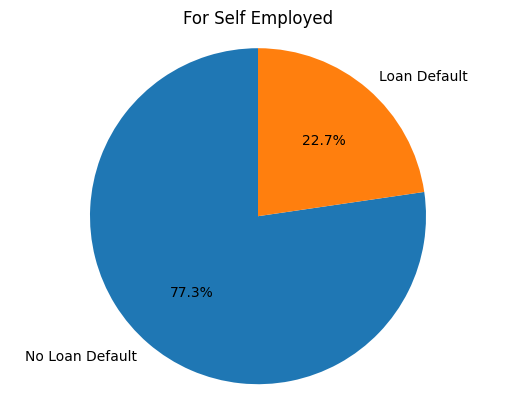

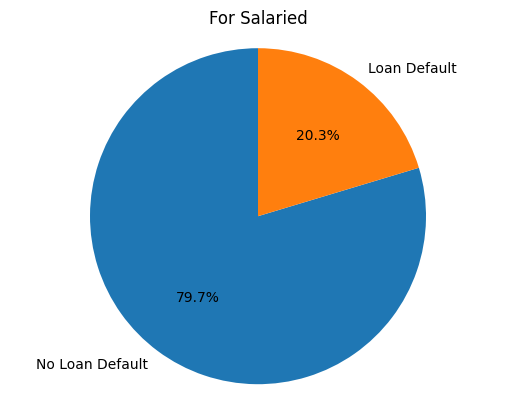

In [274]:
# separate two types of employment
l_self_employed = df[df.Employment_Type =='Self employed']
l_salaried = df[df.Employment_Type=='Salaried']

# count loan_default for self_employed
counts = l_self_employed['loan_default'].value_counts()
labels = ['No Loan Default', 'Loan Default']
sizes = counts.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('For Self Employed')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# count loan_default for salaried employees
counts = l_salaried['loan_default'].value_counts()
labels = ['No Loan Default', 'Loan Default']
sizes = counts.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('For Salaried')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


Observation: 
We notice Self-employed customers are the most common in loan_default. However, between these two types of employment, there is no significance different behaviour  when it comes to loan repayment. It means we cannot consider them as a dominant factor for loan default.

Interpretation: 
- self employed may have higher risk because of less stable income.
- salaried may have the lowest default rate - more predictable income.

Regarding missing values, while on the process of Data Cleaning, i used mode function for imputation.

In [275]:
# To check actual default rates
default_rates = df.groupby('Employment_Type')['loan_default'].mean().sort_values(ascending=False)
print(default_rates)

Employment_Type
Self employed    0.226917
Salaried         0.203458
Name: loan_default, dtype: float64


### Explain how is the target variable distributed overall

In [276]:
print(df['loan_default'].dtype)
print(df['loan_default'].unique())


int64
[0 1]


C:\Users\Amir\AppData\Local\Temp\ipykernel_16496\1700560364.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='loan_default', palette=palette)


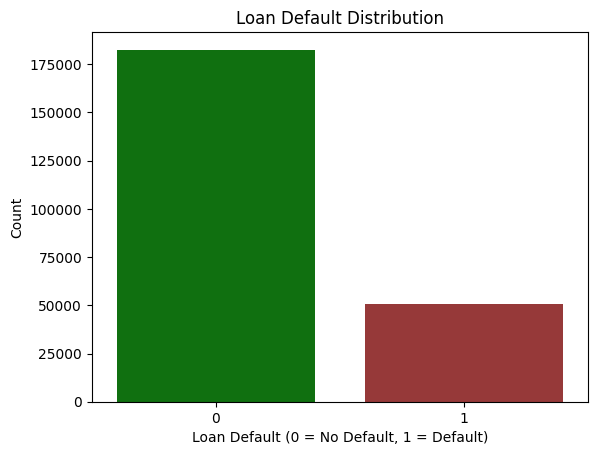

In [277]:
palette = {'0': 'green', '1': 'brown'}

sns.countplot(data=df, x='loan_default', palette=palette)
plt.title('Loan Default Distribution')
plt.xlabel('Loan Default (0 = No Default, 1 = Default)')
plt.ylabel('Count')
plt.show()


In [279]:
print(df.loan_default.value_counts())

loan_default
0    182543
1     50611
Name: count, dtype: int64


- 0 means the loan did NOT default — i.e., the borrower repaid the loan successfully.
- 1 means the loan DID default — i.e., the borrower failed to repay the loan as agreed.

The balance between 0s and 1s tell us about the class imbalance - if defaults(1) are rare, the dataset is imbalanced. Understanding this matter, helps to choose the right metrics and modeling techniques.

### Study the distribution of the target variable across various categories like branch, city, state, branch, supplier, manufacturer, etc.

C:\Users\Amir\AppData\Local\Temp\ipykernel_16496\1082105185.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=default_rate_top_10.index, y=default_rate_top_10.values, palette='rocket')


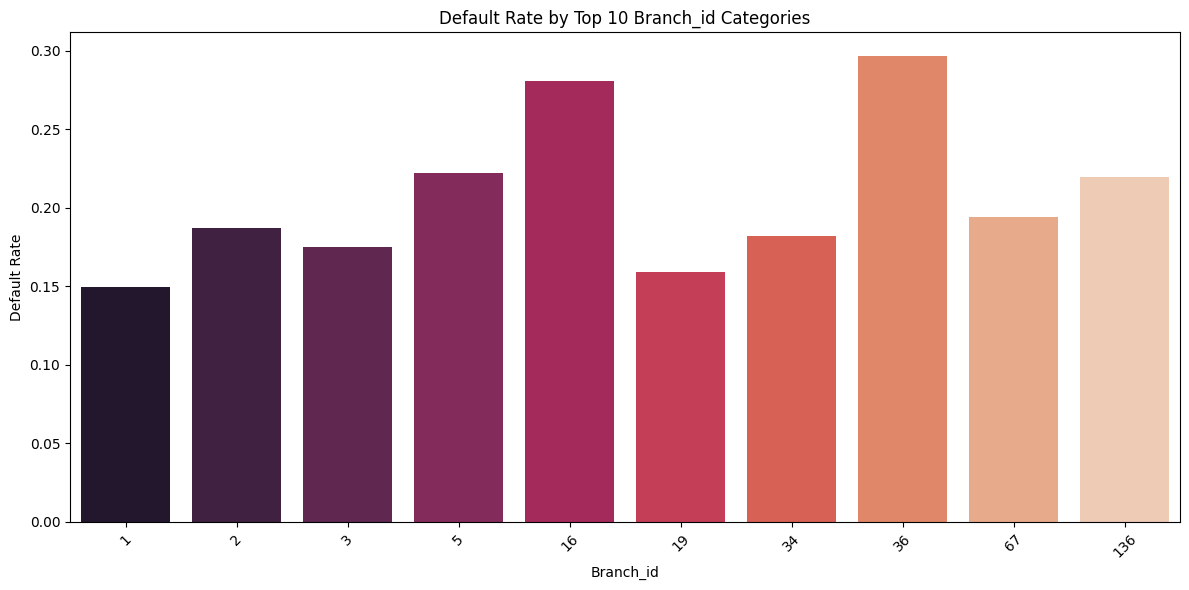

C:\Users\Amir\AppData\Local\Temp\ipykernel_16496\1082105185.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=default_rate_top_10.index, y=default_rate_top_10.values, palette='rocket')


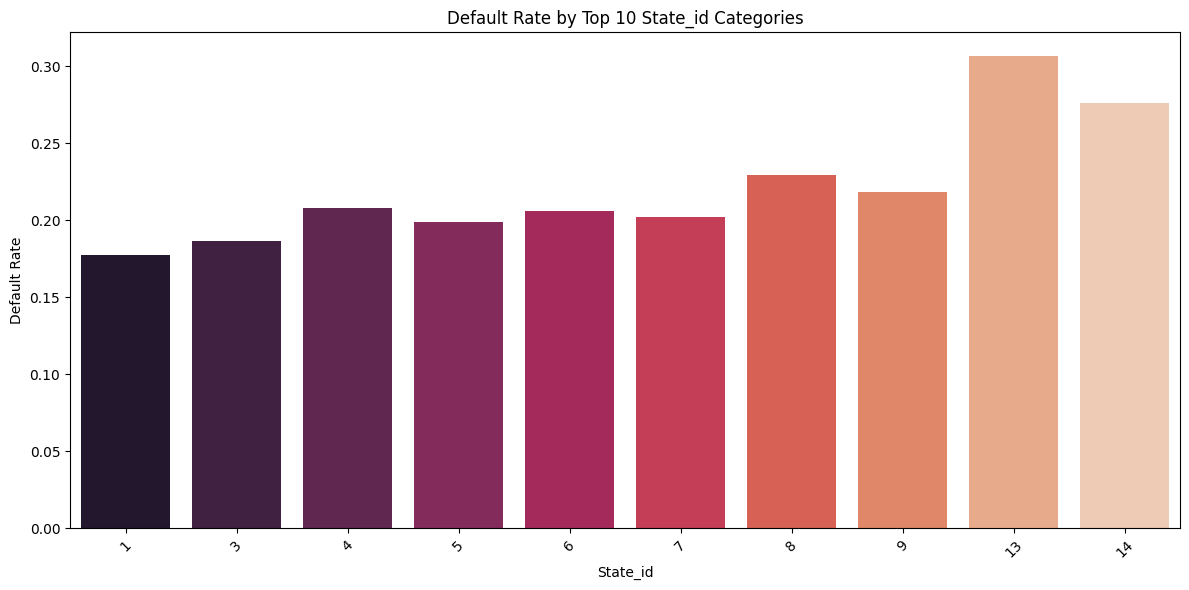

C:\Users\Amir\AppData\Local\Temp\ipykernel_16496\1082105185.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=default_rate_top_10.index, y=default_rate_top_10.values, palette='rocket')


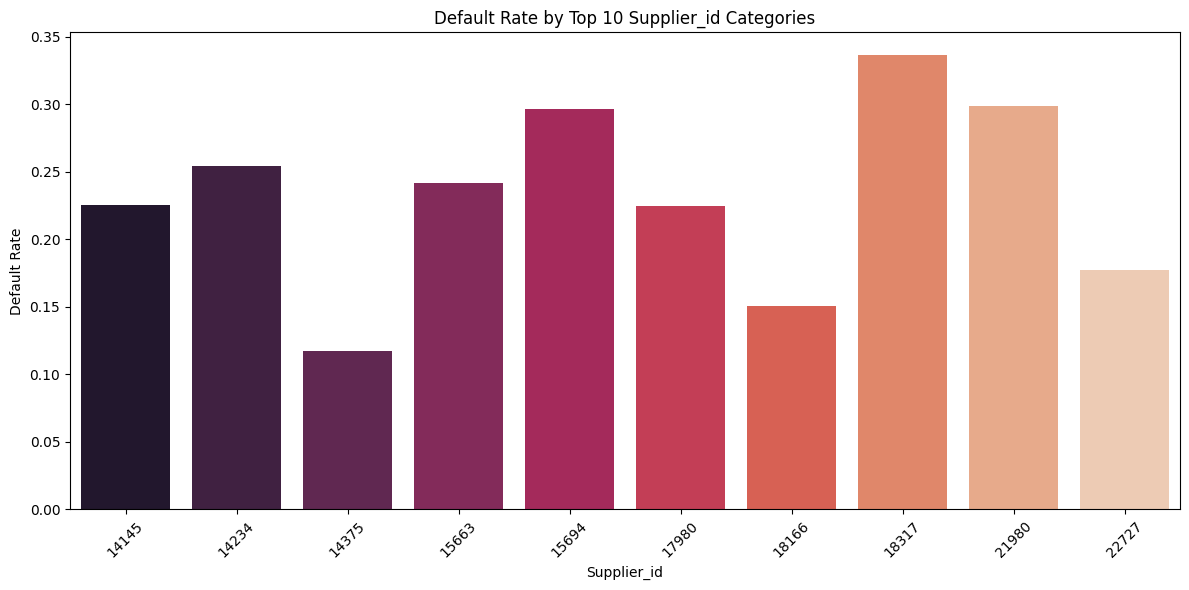

C:\Users\Amir\AppData\Local\Temp\ipykernel_16496\1082105185.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=default_rate_top_10.index, y=default_rate_top_10.values, palette='rocket')


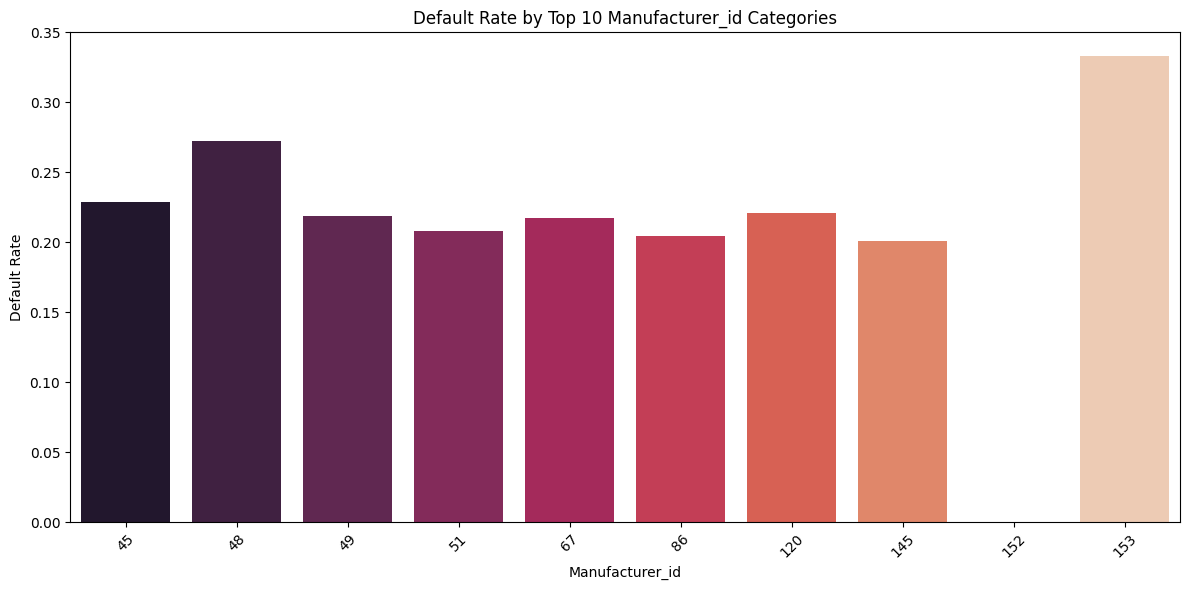

In [280]:
cat_features = ['branch_id', 'State_ID', 'supplier_id', 'manufacturer_id']

for cat in cat_features:
    plt.figure(figsize=(12,6))
    
    # Find top 10 categories by count
    top_10 = df[cat].value_counts().nlargest(10).index
    
    # Calculate default rates for only those top 10 categories
    default_rate_top_10 = df[df[cat].isin(top_10)].groupby(cat)['loan_default'].mean().sort_values(ascending=False)
    
    # Plot
    sns.barplot(x=default_rate_top_10.index, y=default_rate_top_10.values, palette='rocket')
    plt.title(f'Default Rate by Top 10 {cat.capitalize()} Categories')
    plt.ylabel('Default Rate')
    plt.xlabel(cat.capitalize())
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


To read the charts above, trust the height of the bars which, in case of seaborn, represents the actual value of the target variable we are plotting - in this case, default rate.

### Has age got anything to do with defaulting? What is the distribution of age w.r.t. to the defaulters and non-defaulters?

In [289]:

# define the bin edges and labels
bin_edges = [0,18,30,45,60,100]
bin_labels = ['0-18', '19-30', '31-45', '46-60', '61+']

# Create 'Age_group' column with predefined bin_edges and bin_edges 
df['Age_group'] = pd.cut(df['Age'], bins = bin_edges, labels = bin_labels)

In [ ]:
# Plot with countplot — best for categorical axes
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='Age_group', hue='loan_default', palette='Set2')

# Add labels and titles
ax.set_title('Loan Default Distribution Across Age Groups')
ax.set_ylabel('Count')
ax.set_xlabel('Age Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- People aged 31-45 might be the most active borrowers or the group with higher default risk.
- Younger (<19) or older (>61+) borrowers may default less often or have fewer loans.
- As age increases, the default rate seems to slightly decrease. It suggests age is related to default behavior but probably not a simple linear effect.

### What type of ID was presented by most of the customers for proof?

MobileNo_Avl_Flag    233154
Aadhar_flag          195924
VoterID_flag          33794
PAN_flag              17621
Driving_flag           5419
Passport_flag           496
dtype: int64


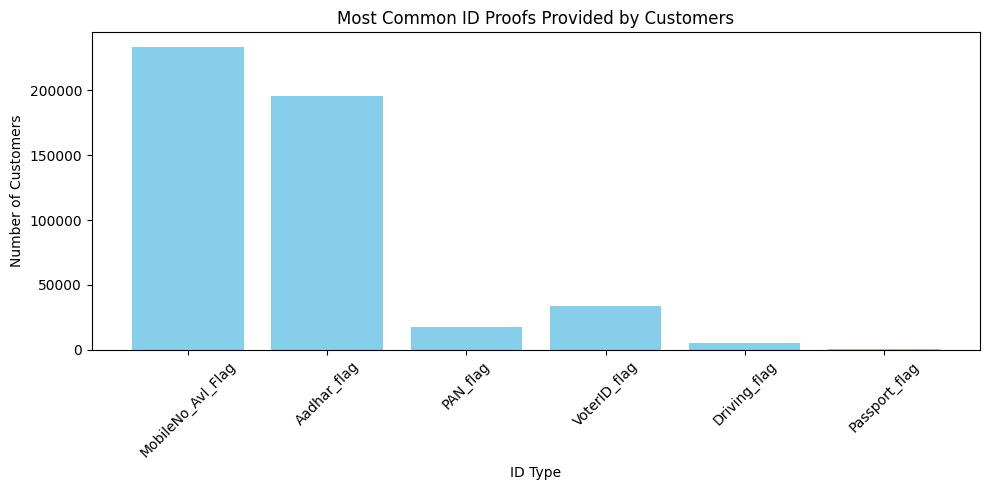

In [ ]:

# Create a dictionary of total counts for each ID type
id_flags = ['MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag', 'Driving_flag', 'Passport_flag']
id_counts = df[id_flags].sum()

print(id_counts.sort_values(ascending=False))

# Plot
plt.figure(figsize=(10, 5))
plt.bar(id_counts.index, id_counts.values, color='skyblue')

plt.title('Most Common ID Proofs Provided by Customers')
plt.xlabel('ID Type')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Observation:
- MobileNo_Avl_Flag seems to be a mandatory proof ID because we've got the record of 233154, so all the customers in dataset has provided it.
- The Aadhar card is the most popular choice for ID proof among customers, followed by the Voter ID and then PAN card.
- Passport ID is the least common field.

## Data Modeling

### Study the credit bureau score distribution. Compare the distribution for defaulters vs. non-defaulters. 

In [ ]:
df.PERFORM_CNS_SCORE_DESCRIPTION.value_counts()

PERFORM_CNS_SCORE_DESCRIPTION
No Bureau History Available                                116950
C-Very Low Risk                                             16045
A-Very Low Risk                                             14124
D-Very Low Risk                                             11358
B-Very Low Risk                                              9201
M-Very High Risk                                             8776
F-Low Risk                                                   8485
K-High Risk                                                  8277
H-Medium Risk                                                6855
E-Low Risk                                                   5821
I-Medium Risk                                                5557
G-Low Risk                                                   3988
Not Scored: Sufficient History Not Available                 3765
J-High Risk                                                  3748
Not Scored: Not Enough Info available on the c

We notice some features like 'Very Low Risk', 'Medium Risk', etc. are ripetitive here that might be for specific categories but we can create summarize them into bins and the special codes category for further analysis.

In [ ]:
# First, make sure the score column is numeric
df['PERFORM_CNS_SCORE'] = pd.to_numeric(df['PERFORM_CNS_SCORE'], errors='coerce')

# Define bins and labels
bins = [299, 350, 570, 630, 705, 900]
labels = ['Very High Risk', 'High Risk', 'Medium Risk', 'Low Risk', 'Very Low Risk']

# Bin the scores
df['score_bucket'] = pd.cut(df['PERFORM_CNS_SCORE'], bins=bins, labels=labels)

# Handle special codes (e.g. 0, 11, 14, etc.)
special_codes = {
    0: 'No Bureau History Available',
    11: 'Not Scored (50+ active accounts)',
    14: 'Not Scored (Guarantor only)',
    15: 'Not Scored (insufficient history)',
    16: 'Inactive',
    17: 'Not Scored (not enough info)',
    18: 'Not Scored (no update in 36 months)'
}

# Create a new column that maps special codes or uses score_bucket
df['score_category'] = df['PERFORM_CNS_SCORE'].map(special_codes)
df['score_category'] = df['score_category'].fillna(df['score_bucket'])


Score the risk factor for Defaulter and non-defaulters.
Calculate the percentage of them.

In [ ]:
# Cross-tab of score categories and default status
score_vs_default = pd.crosstab(df['score_category'], df['loan_default'])

# Normalize to get percentage default rate per score category
score_vs_default_pct = score_vs_default.div(score_vs_default.sum(axis=1), axis=0) * 100

print(score_vs_default_pct)


loan_default                                  0          1
score_category                                            
High Risk                             72.989605  27.010395
Inactive                              81.629116  18.370884
Low Risk                              81.600525  18.399475
Medium Risk                           74.436030  25.563970
No Bureau History Available           76.868747  23.131253
Not Scored (50+ active accounts)     100.000000   0.000000
Not Scored (Guarantor only)           78.688525  21.311475
Not Scored (insufficient history)     74.422311  25.577689
Not Scored (no update in 36 months)   80.964798  19.035202
Not Scored (not enough info)          79.030501  20.969499
Very High Risk                        69.818365  30.181635
Very Low Risk                         84.194133  15.805867


**Observation**:

| Score Category                          | % Non-Defaulters | % Defaulters | Observations                                       |
| --------------------------------------- | ---------------- | ------------ | -------------------------------------------------- |
| **Very Low Risk**                       | 84.2%            | 15.8%        | Lowest default rate — as expected                  |
| **Low Risk**                            | 81.6%            | 18.4%        | Still quite safe                                   |
| **Inactive**                            | 81.6%            | 18.4%        | Surprisingly low default rate — possible edge case |
| **Medium Risk**                         | 74.4%            | 25.6%        | Moderate risk group                                |
| **High Risk**                           | 73.0%            | 27.0%        | Higher default rate                                |
| **Very High Risk**                      | 69.8%            | 30.2%        | Highest default rate — very risky group            |
| **No Bureau History Available**         | 76.9%            | 23.1%        | Significant group; riskier than average            |
| **Not Scored (Guarantor only)**         | 78.7%            | 21.3%        | Moderate risk                                      |
| **Not Scored (insufficient history)**   | 74.4%            | 25.6%        | Similar to Medium Risk                             |
| **Not Scored (not enough info)**        | 79.0%            | 21.0%        | Moderate risk                                      |
| **Not Scored (no update in 36 months)** | 81.0%            | 19.0%        | Somewhat low risk                                  |
| **Not Scored (50+ active accounts)**    | 100.0%           | 0.0%         | Tiny group — likely not statistically significant  |


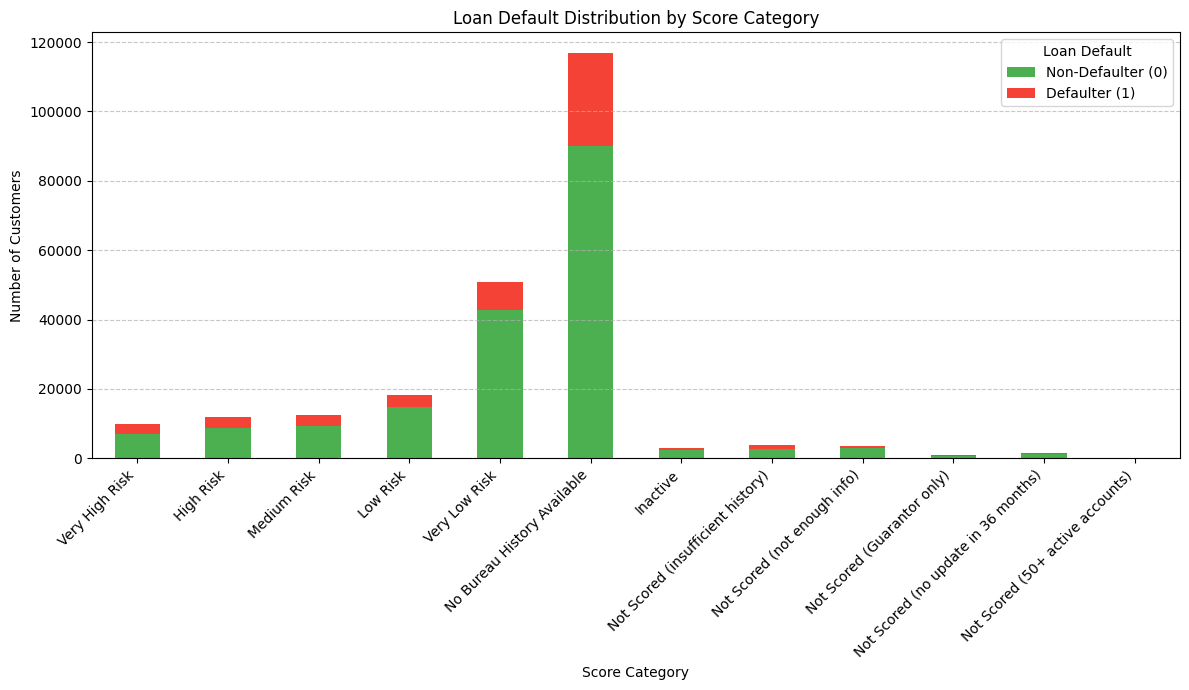

In [ ]:
score_vs_default = pd.crosstab(df['score_category'], df['loan_default'])

# Sort by risk level 
score_vs_default = score_vs_default.loc[
    ['Very High Risk', 'High Risk', 'Medium Risk', 'Low Risk', 'Very Low Risk',
     'No Bureau History Available', 'Inactive',
     'Not Scored (insufficient history)', 'Not Scored (not enough info)',
     'Not Scored (Guarantor only)', 'Not Scored (no update in 36 months)',
     'Not Scored (50+ active accounts)']
]

# Plot the stacked bar chart
score_vs_default.plot(kind='bar', stacked=True, figsize=(12, 7), color=['#4CAF50', '#F44336'])

plt.title('Loan Default Distribution by Score Category')
plt.xlabel('Score Category')
plt.ylabel('Number of Customers')
plt.legend(title='Loan Default', labels=['Non-Defaulter (0)', 'Defaulter (1)'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Observation:
- The credit bureau score is a valuable metric in assessing the risk of a loan applicant.As expected, those with higher scores tend to default less.
- "No Bureau History Available" group has a high number of customers and a default rate od 23.1%, worse than Medium Risk. This group deserves close attention - possibly due to:
   1. new-to-credit customers
   2. unscored due to data mismatch

###  Explore the primary and secondary account details. Is the information in some way related to the loan default probability?

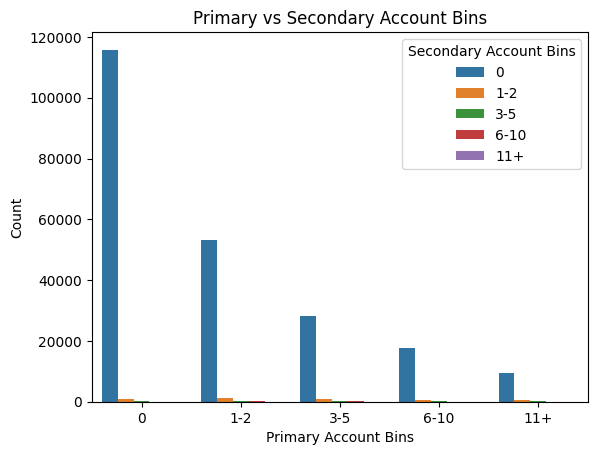

In [ ]:
# Create binned columns
df['PRI_NO_ACCTS_BIN'] = pd.cut(df['PRI_NO_OF_ACCTS'], bins=[-1, 0, 2, 5, 10, 20], labels=['0', '1-2', '3-5', '6-10', '11+'])
df['SEC_NO_ACCTS_BIN'] = pd.cut(df['SEC_NO_OF_ACCTS'], bins=[-1, 0, 2, 5, 10, 20], labels=['0', '1-2', '3-5', '6-10', '11+'])

sns.countplot(data=df, x='PRI_NO_ACCTS_BIN', hue='SEC_NO_ACCTS_BIN')
plt.title('Primary vs Secondary Account Bins')
plt.xlabel('Primary Account Bins')
plt.ylabel('Count')
plt.legend(title='Secondary Account Bins')
plt.show()

In [ ]:
# Grouped default rate by primary and secondary bins
default_rates = df.groupby(['PRI_NO_ACCTS_BIN', 'SEC_NO_ACCTS_BIN'])['loan_default'].mean().unstack()
print(default_rates)

SEC_NO_ACCTS_BIN         0       1-2       3-5      6-10       11+
PRI_NO_ACCTS_BIN                                                  
0                 0.231104  0.258031  0.207143  0.230769  0.555556
1-2               0.218851  0.214173  0.239669  0.225806  0.281250
3-5               0.198684  0.169102  0.177033  0.107143  0.166667
6-10              0.190040  0.143845  0.130435  0.235294  0.166667
11+               0.173098  0.122727  0.151515  0.128205  0.000000


C:\Users\Amir\AppData\Local\Temp\ipykernel_16496\3160657211.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  default_rates = df.groupby(['PRI_NO_ACCTS_BIN', 'SEC_NO_ACCTS_BIN'])['loan_default'].mean().unstack()


Observation: 
- Most customers - regardless of how many primary accounts they have - have 0 secondary accounts (blue is always the tallest bar).
- As primary accounts increase, we start seeing: more orange, then green and occasionally red (especially in the middle ranges like 1-2 and 3-5 PA) - showing a growing number of secondary accounts. 
- For higher PA bins (6-10, 11+), green/orange still appear, but red disappears again.

C:\Users\Amir\AppData\Local\Temp\ipykernel_16496\2020624279.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  default_rates = df.groupby(['PRI_NO_ACCTS_BIN', 'SEC_NO_ACCTS_BIN'])['loan_default'].mean().unstack()


Text(0.5, 1.0, 'Default Rate by Primary and Secondary Account Bins')

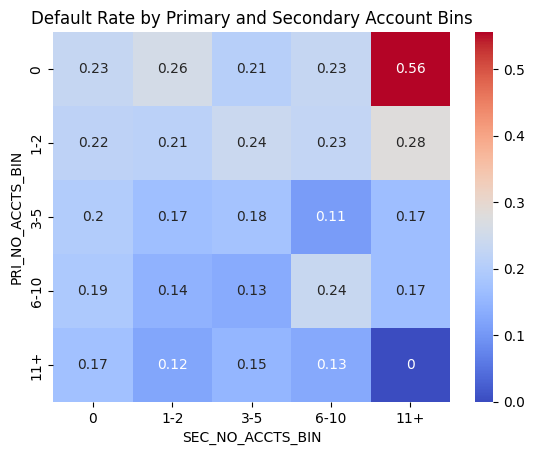

In [ ]:
# Default rates by account combinations
default_rates = df.groupby(['PRI_NO_ACCTS_BIN', 'SEC_NO_ACCTS_BIN'])['loan_default'].mean().unstack()

# Visualize
sns.heatmap(default_rates, annot=True, cmap='coolwarm')
plt.title('Default Rate by Primary and Secondary Account Bins')

Observation:
- 56% of customers with 0 PA defaulted on their vehicle loan.
- This is a risky borrower profile: No history of primary accounts (could mean no independent credit history). Yet they are involved in several secondary accounts (e.g., co-signed loans), which may indicate financial burden without full credit responsibility.
- The rest of the matrix shows default rates mostly between 11% to 28%:
      Default rates generally decrease as you move down rows (more primary accounts) and
      Also decrease or stay low moving left to right in some rows (less secondary accounts).
- The last cell (bottom-right) is zero, possibly meaning:
      No defaults in customer with highest primary and secondary accounts bin or
      No data for this group.

Prediction:
- Customers with no primary accounts but high secondary accounts are the riskiest group.
- Increasing primary accounts generally relates to lower default rates.
- Secondary accounts alone don't seem to increase risk much unless primary accounts are zero.

In [ ]:
# Find Top 3 Risky Account Combinations

# Group by binned categories and calculate mean default rate
default_rates = df.groupby(['PRI_NO_ACCTS_BIN', 'SEC_NO_ACCTS_BIN'])['loan_default'].mean()

# Sort in descending order of default rate
top_risk_combinations = default_rates.sort_values(ascending=False).head(3)

print("Top 3 highest-risk primary/secondary account combinations:")
print(top_risk_combinations)

Top 3 highest-risk primary/secondary account combinations:
PRI_NO_ACCTS_BIN  SEC_NO_ACCTS_BIN
0                 11+                 0.555556
1-2               11+                 0.281250
0                 1-2                 0.258031
Name: loan_default, dtype: float64


C:\Users\Amir\AppData\Local\Temp\ipykernel_16496\738020081.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  default_rates = df.groupby(['PRI_NO_ACCTS_BIN', 'SEC_NO_ACCTS_BIN'])['loan_default'].mean()


## Is there a difference between the sanctioned and disbursed amount of primary and secondary loans? Study the difference by providing appropriate statistics and graphs.

In [ ]:
# first we look at the descriptive statistics of those variables
descriptive_stat = df[['PRI_SANCTIONED_AMOUNT', 'PRI_DISBURSED_AMOUNT', 'SEC_SANCTIONED_AMOUNT', 'SEC_DISBURSED_AMOUNT']].describe()
print(descriptive_stat)

       PRI_SANCTIONED_AMOUNT  PRI_DISBURSED_AMOUNT  SEC_SANCTIONED_AMOUNT  \
count           2.331540e+05          2.331540e+05           2.331540e+05   
mean            2.185039e+05          2.180659e+05           7.295923e+03   
std             2.374794e+06          2.377744e+06           1.831560e+05   
min             0.000000e+00          0.000000e+00           0.000000e+00   
25%             0.000000e+00          0.000000e+00           0.000000e+00   
50%             0.000000e+00          0.000000e+00           0.000000e+00   
75%             6.250000e+04          6.080000e+04           0.000000e+00   
max             1.000000e+09          1.000000e+09           3.000000e+07   

       SEC_DISBURSED_AMOUNT  
count          2.331540e+05  
mean           7.179998e+03  
std            1.825925e+05  
min            0.000000e+00  
25%            0.000000e+00  
50%            0.000000e+00  
75%            0.000000e+00  
max            3.000000e+07  


Observation:
Looking at the mean values reveals a minor difference between the amounts sanctioned and those actually disbursed for both Primary and Secondary accounts. The distribution of both sanctioned and disbursed amounts for primary loans is highly skewed. This skewness is evident from the median (50th percentile) being zero and the large standard deviation.

## Do customer who make higher number of enquiries end up being higher risk candidates?

In [ ]:
print(df['NO_OF_INQUIRIES'].describe())

count    233154.000000
mean          0.206615
std           0.706498
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          36.000000
Name: NO_OF_INQUIRIES, dtype: float64


In [ ]:
print(df[['NO_OF_INQUIRIES', 'loan_default']].corr())

                 NO_OF_INQUIRIES  loan_default
NO_OF_INQUIRIES         1.000000      0.043678
loan_default            0.043678      1.000000


Observation:

The correlation between two features is 0.0437, which means the correlation is very weak and positive. 

This suggests there's almost no linear relationship between the number of enquiries and whether a customer defaults. However, just the no_of_enquiries alone is not a strong predictor of loan_default. In credit risk modeling, especially in banking, relationships might be non-linear. There might be interactions with other features (such as income, age, or credit history).

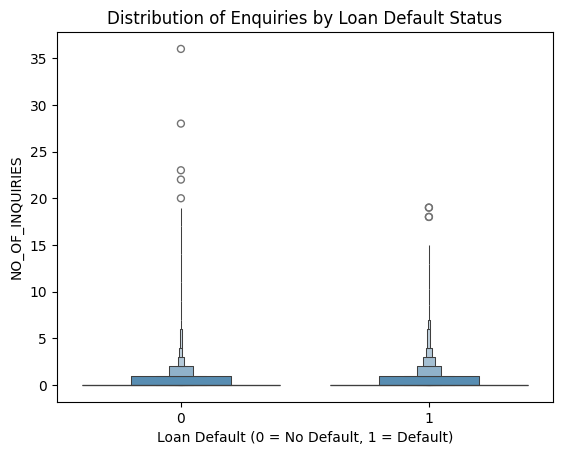

In [ ]:
sns.boxenplot(x='loan_default', y='NO_OF_INQUIRIES', data = df)
plt.title('Distribution of Enquiries by Loan Default Status')
plt.xlabel('Loan Default (0 = No Default, 1 = Default)')
plt.show()

## Is credit history, that is new loans in last six months, loans defaulted in last six months, time since first loan, etc., a significant factor in estimating probability of loan defaulters?

In [ ]:
# Check correlations
credit_features = [
    'NEW_ACCTS_IN_LAST_SIX_MONTHS',
    'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS',
    'CREDIT_HISTORY_LENGTH',
    'AVERAGE_ACCT_AGE' 
]

In [ ]:
df[credit_features + ['loan_default']].corr()

,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,CREDIT_HISTORY_LENGTH,AVERAGE_ACCT_AGE,loan_default
NEW_ACCTS_IN_LAST_SIX_MONTHS,1.000000,0.182769,0.200087,0.033372,-0.029400
DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,0.182769,1.000000,0.262218,0.171348,0.034462
CREDIT_HISTORY_LENGTH,0.200087,0.262218,1.000000,0.831952,-0.042126
AVERAGE_ACCT_AGE,0.033372,0.171348,0.831952,1.000000,-0.024781
loan_default,-0.029400,0.034462,-0.042126,-0.024781,1.000000


Very Weak Correlation
All correlation values are between -0.05 and +0.05, meaning there's almost no linear relationship between each feature and loan_default.

- CREDIT_HISTORY_LENGTH: -0.042
Slight negative relationship: longer credit history is slightly associated with lower risk.

- DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS: +0.034
Slight positive correlation: more recent delinquencies → slightly higher default rate.

- NEW_ACCTS_IN_LAST_SIX_MONTHS: -0.029
This is surprising — slight negative correlation (more new accounts → slightly less default?), but too weak to trust as-is.

## Perform logistic regression modeling, predict the outcome for the test data, and validate the results using the confusion matrix.

In [293]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [294]:
# Define categorical features
cat_features = [
    'UniqueID',  
    'branch_id',  
    'supplier_id',  
    'manufacturer_id',  
    'Current_pincode_ID',  
    'Employment_Type',  
    'loan_default'
]
# Define numerical features
num_features = [
    'disbursed_amount',  
    'asset_cost',  
    'ltv',  
    'Age',  
    'SEC_SANCTIONED_AMOUNT',  
    'SEC_DISBURSED_AMOUNT',  
    'PRIMARY_INSTAL_AMT',  
    'SEC_INSTAL_AMT',  
    'NEW_ACCTS_IN_LAST_SIX_MONTHS',  
    'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS',  
    'AVERAGE_ACCT_AGE',  
    'CREDIT_HISTORY_LENGTH',  
    'NO_OF_INQUIRIES'
]
target = 'loan_default'

In [295]:
# Step 2: Encode categorical features as numeric if needed
data_encoded = df[cat_features].copy()
for col in cat_features:
    data_encoded[col] = data_encoded[col].astype('category').cat.codes

# Step 3: Calculate correlation matrix
corr_matrix = data_encoded.corr()

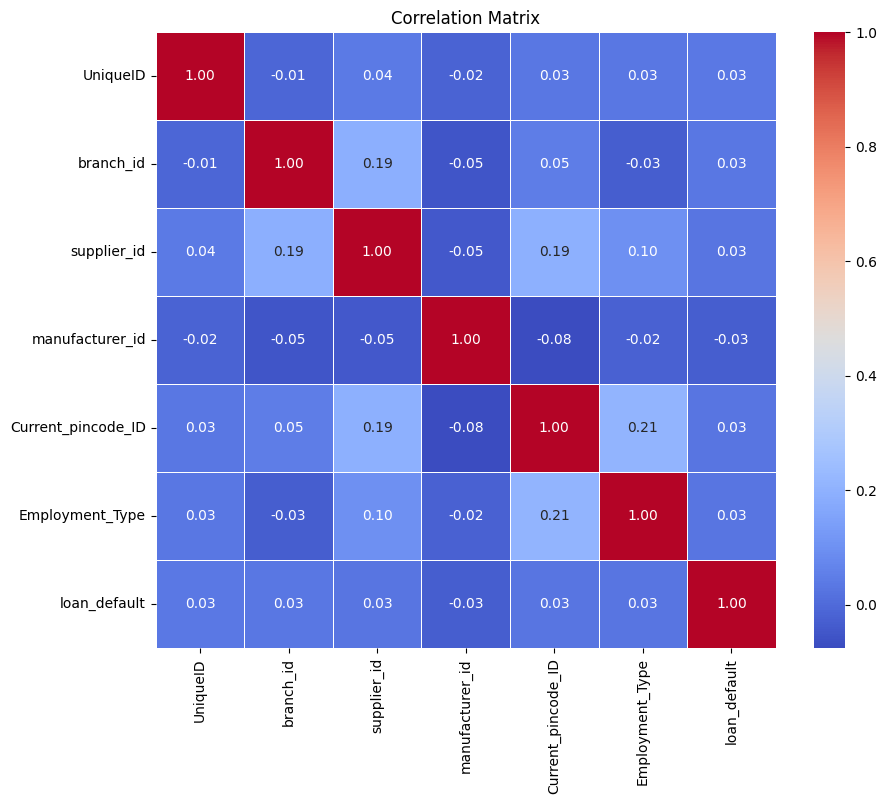

In [296]:
# Step 4. Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [297]:
# Step 1: Split Features and Targets
X = df.drop('loan_default', axis=1)  
y = df['loan_default']

In [298]:
# Step 2: Identify Column Types
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

In [299]:
# Step 4: Define Preprocessing Steps

# One-hot encode categorical data
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Scale numerical data
numerical_transformer = StandardScaler()

# Combine both using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [300]:
# Step 5: Build Pipeline with Logistic Regression
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

In [301]:
# Step 6: Train-Test Split and Fit
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'State_ID',
       'Employee_code_ID', 'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag',
       'VoterID_flag', 'Driving_flag', 'Passport_flag', 'PERFORM_CNS_SCORE',...
       'PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT', 'NEW_ACCTS_IN_LAST_SIX_MONTHS',
       'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 'AVERAGE_ACCT_AGE',
       'CREDIT_HISTORY_LENGTH', 'NO_OF_INQUIRIES'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Employment_Type', 'PERFORM_CNS_SCORE_DESCRIPTION', 'Age_group'], dtype='object'))])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [304]:
# Step 7: Evaluate the Model and Heatmap chart
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88     36733
           1       0.44      0.01      0.01      9898

    accuracy                           0.79     46631
   macro avg       0.61      0.50      0.45     46631
weighted avg       0.71      0.79      0.70     46631



The model predicts almost every sample as class 0 (no defaut). For class 1, recall is only 1%, meaning it's missinf almost all the actyal defaults.
This is likely due to class imbalance - the model is biased toward predicting the majority class.